In [1]:
addprocs(20)
@everywhere include("voiConsAuc.jl")

In [2]:
@everywhere f(n, p) = evsi_sim([1, 0], [1, .2], [n * p, n * (1 - p)], nsims = 10000000)

In [3]:
@time x = @parallel hcat for i = 1:50
    [f(i, j) for j = .99:-.02:.01]
end

427.006045 seconds (689.68 k allocations: 29.216 MB, 0.00% gc time)


50×50 Array{Float64,2}:
  0.0249046     0.0435123     0.0531082    …  0.0798401  0.0795739  0.0794478
  0.0247918     0.04256       0.0526813       0.0788774  0.0782992  0.0787543
  0.0236787     0.0416286     0.0520369       0.0778604  0.0782036  0.0778296
  0.0229117     0.041261      0.0510435       0.0780406  0.0778306  0.0781779
  0.0224685     0.0402121     0.0507936       0.0780446  0.0783102  0.0782121
  0.0218508     0.0400176     0.0496674    …  0.0786345  0.0786384  0.0780851
  0.0210792     0.0393502     0.0494187       0.0785385  0.0785354  0.0787364
  0.0211169     0.0387252     0.049149        0.0782909  0.0784157  0.0782635
  0.0202591     0.0376733     0.0478471       0.0786826  0.0785776  0.0788346
  0.019338      0.0366395     0.0470018       0.079066   0.0789899  0.0791733
  0.0186808     0.0362786     0.0465992    …  0.0793125  0.079353   0.0792544
  0.0180767     0.0355524     0.0455319       0.0793419  0.079254   0.0795565
  0.0174667     0.0351389     0.0448956 

In [4]:
using RCall, DataFrames

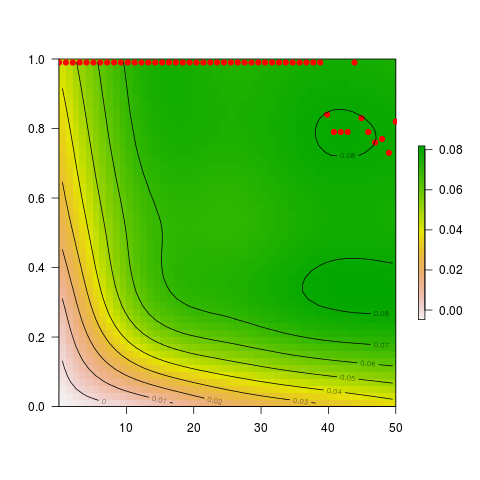

RCall.RObject{RCall.RealSxp}
[1] 0.2 0.4 0.6 0.8 1.0


In [7]:
R"
    library(raster)
    library(mgcv)
    r = $x
    r = 
      data.frame(
        x = rep(seq_len(ncol(r)), each = nrow(r)),
        y = rep(seq_len(nrow(r)), times = ncol(r)),
        z = c(r)
    )
    r = gam(z ~ te(x, y), data = r)
    r = matrix(fitted(r), ncol = 50)
    r = raster(r)
    x = seq(0, 1, length.out = 50)
    m = seq(.99, .01, -.01)[apply($x, 2, which.max)]
    plot(r, asp = NA, las = 1, xaxt = 'n')
    #m = predict(gam(m ~ s(x)))
    points(x, m, pch = 19, col = 'red')
    contour(r, add = TRUE)
    axis(1, at = 1:5 / 5, label = seq(10, 50, length.out = 5))
"

In [ ]:
function an_evi(μ = [0, 0], σ = [1, 1])
    function g(n)
        f(p) = evsi_an(μ, σ, [n * p, n * (1 - p)])
        vcat(map(f, .99:-.02:.01)...)
    end
    hcat(map(g, collect(linspace(1, 50, 50)))...)
end

In [ ]:
function sim_evi(μ = [0, 0,], σ = [1, 1, 1])
   f(p, n) = evsi_sim(μ, σ, [n * p, n * (1 - p), ], nsims = 1000000)
   [f(i, j) for i = 1:-.05:0, j = 1:1:50]
end

In [ ]:
y = an_evi([1, 0], [1, .2])

In [ ]:
R"
    library(raster)
    library(mgcv)
    r = $y
    r = raster(r)
    x = seq(0, 1, length.out = 50)
    m = seq(1, 0, -.05)[apply($y, 2, which.max)]
    plot(r, asp = NA, las = 1, xaxt = 'n')
    points(x, m, pch = 19, col = 'red')
    contour(r, add = TRUE)
    axis(1, at = 1:5 / 5, label = seq(10, 50, length.out = 5))
"